In [2]:
import tweepy
import json
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()
from config import consumer_key, consumer_secret, access_token, access_token_secret
import pandas as pd
import matplotlib.pyplot as plt

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
api = tweepy.API(auth)

In [3]:
target_uers=["BBC","BostonGlobe" ,"CBS", "CNN", "FoxNews", ]



sentiments = []

for user in target_uers:
    # Lists for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweets_ago = []
    news_source = []
    
    counter = 0


    for pages in tweepy.Cursor(api.user_timeline, id=user).pages(5):
        # page is a tweet "status"
        #page = page[0]
        #could also use the following instead of 

        for page in pages:

            #must have these lines when you are using cursor
            tweet = json.dumps(page._json, indent=3)
            tweet = json.loads(tweet)

            # Parse the tweet to identify its text
            text= tweet["text"]

            # Analyze the sentiment of the tweet
            total_scores = analyzer.polarity_scores(text)
            compound=total_scores["compound"]
            pos = total_scores["pos"]
            neu = total_scores["neu"]
            neg = total_scores["neg"]

            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweets_ago.append(counter) 
            news_source.append(user)

            #calculation tweet agao
            counter = counter +1
            # Add the sentiment analyses to the respective lists
    sentiments.append(pd.DataFrame({
            "Compound": compound_list,
            "Positive": positive_list,
            "Negative": negative_list,
            "Neutral": neutral_list,
            "Tweets Ago": tweets_ago,
            "News Source": news_source}))
#     #for sentiment in sentiments:
#         sentiments_df = pd.DataFrame(sentiments)
#         x_axis=np.arange(len(sentiments_df["Compound"]))
#         plt.plot(x_axis,
#         sentiments_df["Compound"], marker="o", linewidth=0.5,
#         alpha=0.8, label=user)
#     plt.ylabel("Tweets Ago")
#     plt.ylabel("Tweet Polarity")
#     plt.title("Sentiment Analysis of Tweet 3/10/18" + str(user))

#     plt.show()


# Print the average sentiments of the tweets
    #print("")
    #print("User: %s" % user)
    #print("Compound: %s" % np.mean(compound_list))
    #print("Positive: %s" % np.mean(positive_list))
    #print("Neutral: %s" % np.mean(neutral_list))
    #print("Negative: %s" % np.mean(negative_list))
    #print(sentiments)

In [4]:
concat_df = pd.concat([df for df in sentiments])
concat_df

#concat_df.index

#BBC = concat_df["Compound"].loc[:,'BBC'].values
#grouped.count()
concat_df.index

concat_df

,Compound,Negative,Neutral,News Source,Positive,Tweets Ago
0,0.8625,0.000,0.699,BBC,0.301,0
1,0.3628,0.073,0.784,BBC,0.143,1
2,0.4019,0.000,0.881,BBC,0.119,2
3,-0.7244,0.336,0.664,BBC,0.000,3
4,0.5106,0.112,0.643,BBC,0.245,4
5,0.8883,0.000,0.488,BBC,0.512,5
6,0.6249,0.000,0.796,BBC,0.204,6
7,0.6996,0.066,0.658,BBC,0.276,7
8,0.0000,0.000,1.000,BBC,0.000,8
9,-0.7717,0.251,0.749,BBC,0.000,9


In [5]:
bbc = concat_df[concat_df['News Source'] == 'BBC']
bbc.head()

,Compound,Negative,Neutral,News Source,Positive,Tweets Ago
0,0.8625,0.000,0.699,BBC,0.301,0
1,0.3628,0.073,0.784,BBC,0.143,1
2,0.4019,0.000,0.881,BBC,0.119,2
3,-0.7244,0.336,0.664,BBC,0.000,3
4,0.5106,0.112,0.643,BBC,0.245,4


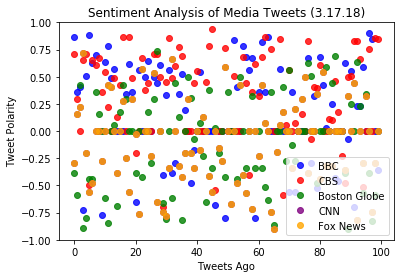

In [13]:
sentiments
BBC=sentiments[0]["Compound"]
Boston_Globe = sentiments[1]["Compound"]
CBS=sentiments[2]["Compound"]
CNN=sentiments[3]["Compound"]
CNN=sentiments[3]["Compound"]
Fox=sentiments[4]["Compound"]

total_x_axis= np.arange(0,100,1)
plt.plot((np.arange(0,100,1)),BBC, marker="o",color="b", linewidth=0.0, alpha=0.8, label="BBC")
plt.plot((np.arange(0,100,1)),CBS, marker="o",color ="r" ,linewidth=0.0, alpha=0.8, label="CBS")
plt.plot((np.arange(0,100,1)),Boston_Globe, marker="o",color ="g" ,linewidth=0.0, alpha=0.8, label="Boston Globe")
plt.plot((np.arange(0,100,1)),CNN, marker="o",color ="purple" ,linewidth=0.0, alpha=0.8, label="CNN")
plt.plot((np.arange(0,100,1)),CNN, marker="o",color ="orange" ,linewidth=0.0, alpha=0.8, label="Fox News")

plt.ylim(-1,1) 
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (3.17.18)")


plt.legend(loc="best")
plt.show()


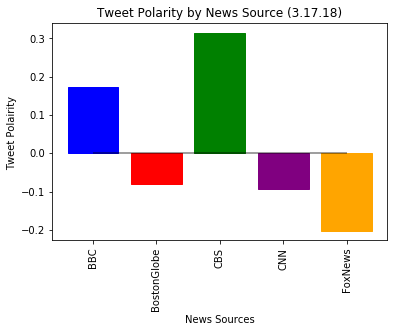

In [12]:
#grouping by News Source 
grouped=concat_df.groupby("News Source")

#calculating the mean compound score for each news site
mean_df =grouped["Compound"].mean()


#Creating x-axis the legnth of the mean_df
x_axis = np.arange(len(mean_df))

#Creating var chart
barlist=plt.bar(x_axis, mean_df, align="center", color='g')
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(x_axis, target_uers, rotation="vertical")

barlist[0].set_color('b')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('purple')
barlist[4].set_color('orange')

# Give our chart some labels and a tile
plt.title("Tweet Polarity by News Source (3.17.18)")
plt.xlabel("News Sources")
plt.ylabel("Tweet Polairity ")

plt.hlines(0, 0, 4, alpha=0.5)
plt.show()

In [ ]:
mean_df